In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


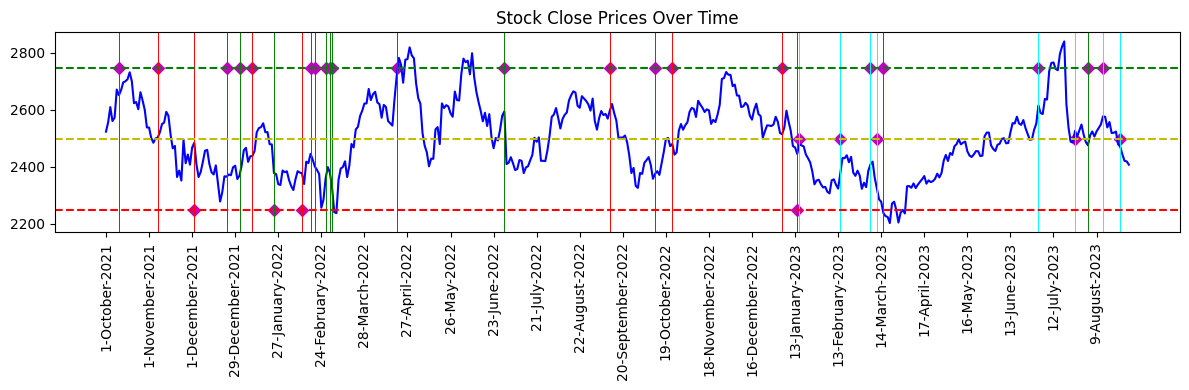

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load data from CSV file
csv_file_path = '/content/drive/MyDrive/Research/Research Dataset - Stock Chart (Reliance).csv'
df = pd.read_csv(csv_file_path)

#Setting values
std = df["Close_Price"].std()
predictav = df["Close_Price"].mean()
predictlower = predictav - 2*std
predictupper = predictav + 2*std


#Selecting dataframe columns and ranges
closeprice = list(df['Close_Price'])
days = list(df.Days)

chatval = list(df.ChatGPT)
lst = [_ for _ in range(0,len(df))]

for i in range(len(df)-1,-1,-1):
  if chatval[i] == 0:
    chatval[i] = predictav
  elif chatval[i] == 1:
    chatval[i] = predictupper
  elif chatval[i] == -1:
    chatval[i] = predictlower
  else:
    chatval.pop(i)
    lst.pop(i)


#Plotting stock value line
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Close_Price'], label='Close_Price', color='blue')
plt.title('Stock Close Prices Over Time')
count = 0;

#Conditions for correct and wrong predictions
for i in range(0,len(lst)):
  ival = lst[i]
  daystohold = days[ival]
  prediction = np.sign(chatval[i]-predictav)
  if ival+daystohold>len(closeprice):
    col = 'cyan'
  elif prediction == 0:
    col = 'cyan'
  else:
    if prediction == -1:
      daystohold=30
    currentcp = closeprice[ival]
    finalcp = closeprice[int(ival+daystohold)]
    sign = np.sign(finalcp-currentcp)
    if sign*prediction==1:
      col = 'green'

    if sign*prediction==-1:
      col = 'red'
      count += 1;

  plt.axvline(x = ival, color = col, linestyle = '-', linewidth = 0.7)


#Plotting predictions against stock close prices
plt.axhline(y = predictlower, color = 'r', linestyle = '--')
plt.axhline(y = predictupper, color = 'g', linestyle = '--')
plt.axhline(y = predictav, color = 'y', linestyle = '--')

plt.scatter(lst,chatval,color='m',marker = 'D')


plt.xticks(df['Date'][::20], rotation=90)

plt.tight_layout()
plt.show()




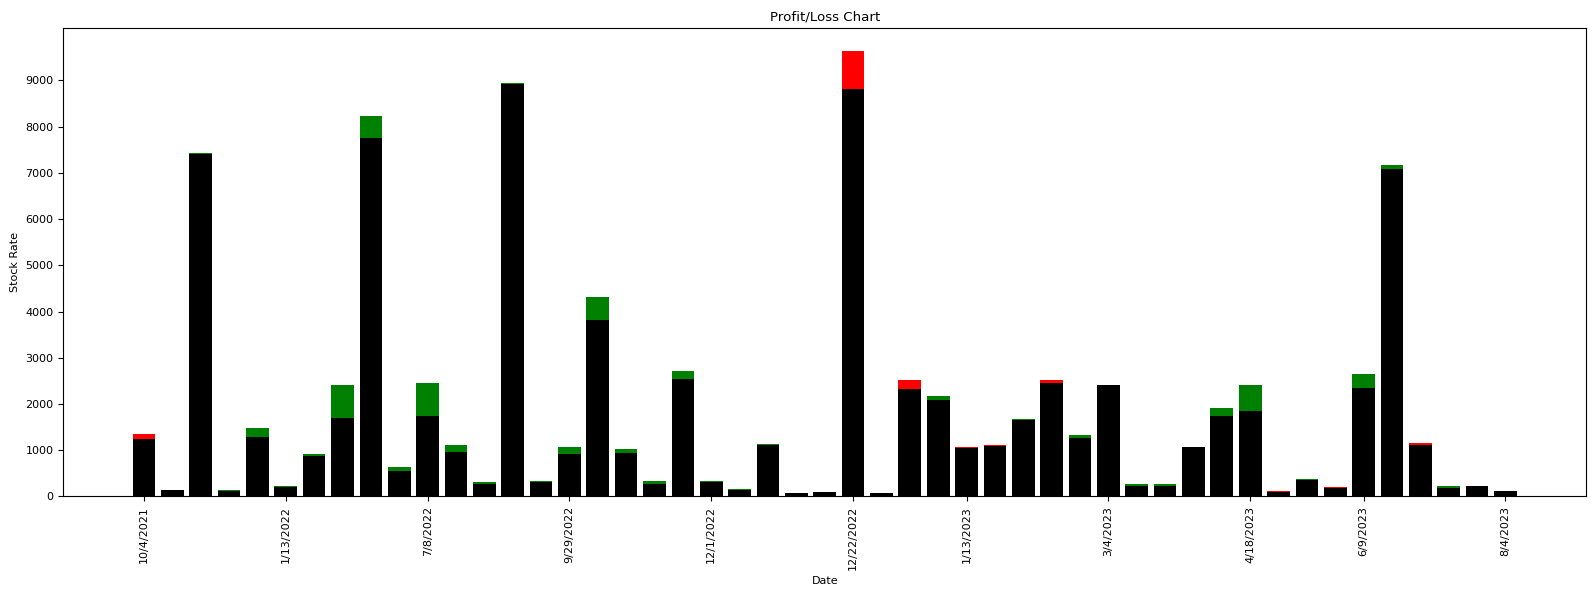

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load data from CSV file
csv_file_path = '/content/drive/MyDrive/Research/Research Dataset - SecondFindings.csv'
data = pd.read_csv(csv_file_path)
plt.rcParams.update({"font.size":8})

#Extract relevant columns
date = data["Date"]
xaxis = data["index"]
one_day_after = data["Stock rate (one day after)"]
after_hold_period = data["Stock rate (after hold period)"]
xaxis = xaxis.tolist()
date = date.tolist()
one_day_after = one_day_after.tolist()
one_day_after = [float(i.replace(",","")) for i in one_day_after]
after_hold_period = after_hold_period.tolist()
after_hold_period = [float(i.replace(",","")) for i in after_hold_period]
blackgraph = [min(after_hold_period[i] , one_day_after[i]) for i in range(len(one_day_after))]

#Create a stacked bar graph
plt.figure(figsize=(16,6))  #Adjust the figure size as needed
plt.bar(date, one_day_after, color="red",alpha=1)
plt.bar(date, after_hold_period, label="Stock rate (after hold period)", color="green", alpha=1)
plt.bar(date,blackgraph,color="k")

#Customize the plot
plt.xlabel("Date")
plt.ylabel("Stock Rate")
plt.title("Profit/Loss Chart")
plt.xticks(rotation=90)
plt.yticks(range(0,10000,1000))

#Show the plot
plt.xticks(data['Date'][::5])
plt.tight_layout()
plt.show()
